# Introduction

Notebook to aggregate the running of models in the context of traceability between features and bug reports.

# Load Libraries and Datasets

In [1]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

import pandas as pd
import numpy as np

from modules.models_runner.feat_br_runner import Feat_BR_Runner
from modules.utils import firefox_dataset_p2 as fd
from modules.utils import aux_functions

import warnings; warnings.simplefilter('ignore')

# Run All Models

## Union Strategy

In [2]:
runner_1 = Feat_BR_Runner(oracle=fd.Feat_BR_Oracles.read_feat_br_expert_volunteers_union_df().T)

lsi_model_1, lsi_eval_1 = runner_1.run_lsi_model()
lda_model_1, lda_eval_1 = runner_1.run_lda_model()
bm25_model_1, bm25_eval_1 = runner_1.run_bm25_model()
w2v_model_1, w2v_eval_1 = runner_1.run_word2vec_model()

Expert and Volunteers Matrix UNION.shape: (93, 21)
Features.shape: (21, 8)
SelectedBugReports.shape: (93, 18)

Model Evaluation -------------------------------------------

Model Evaluation -------------------------------------------

Model Evaluation -------------------------------------------

Model Evaluation -------------------------------------------


### Results

In [3]:
results_1 = aux_functions.compile_results({'lsi_model':lsi_model_1,'lda_model':lda_model_1,'bm25_model':bm25_model_1,'w2v_model':w2v_model_1,
                                         'lsi_eval':lsi_eval_1, 'lda_eval':lda_eval_1, 'bm25_eval':bm25_eval_1, 'w2v_eval':w2v_eval_1})
results_1.head()

,model,precision,recall,fscore,precision_perc,recall_perc,fscore_perc
0,LSI_Model_Feat_BR,0.354839,0.249552,0.278580,35.483871,24.955197,27.857996
1,LDA_Model_Feat_BR,0.137289,0.543100,0.207073,13.728879,54.310036,20.707321
2,BM25_Model_Feat_BR,0.072197,0.849462,0.128784,7.219662,84.946237,12.878421
3,WordVec_Model_Feat_BR,0.090016,0.738620,0.152272,9.001552,73.862007,15.227199


### Plots

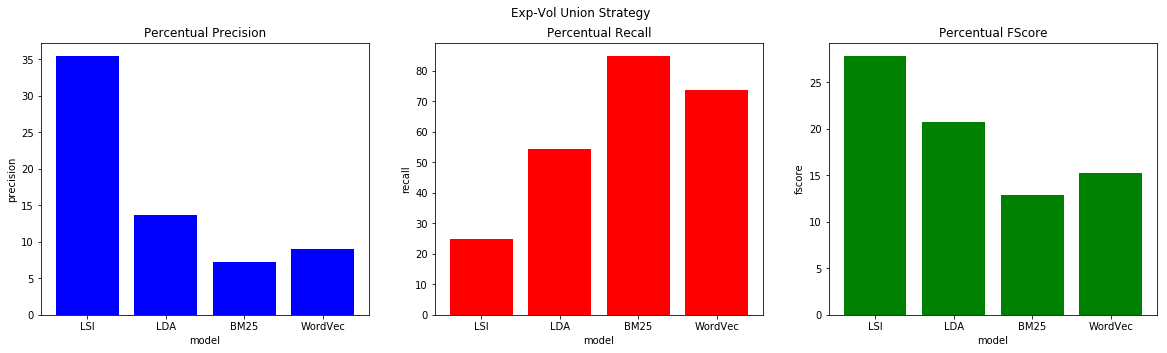

In [4]:
aux_functions.plot_results(results_1, title='Exp-Vol Union Strategy')

## Intersec Strategy

In [5]:
runner_2 = Feat_BR_Runner(oracle=fd.Feat_BR_Oracles.read_feat_br_expert_volunteers_intersec_df().T)

lsi_model_2, lsi_eval_2 = runner_2.run_lsi_model()
lda_model_2, lda_eval_2 = runner_2.run_lda_model()
bm25_model_2, bm25_eval_2 = runner_2.run_bm25_model()
w2v_model_2, w2v_eval_2 = runner_2.run_word2vec_model()

Expert and Volunteers Matrix INTERSEC.shape: (93, 21)
Features.shape: (21, 8)
SelectedBugReports.shape: (93, 18)

Model Evaluation -------------------------------------------

Model Evaluation -------------------------------------------

Model Evaluation -------------------------------------------

Model Evaluation -------------------------------------------


### Results

In [6]:
results_2 = aux_functions.compile_results({'lsi_model':lsi_model_2,'lda_model':lda_model_2,'bm25_model':bm25_model_2,'w2v_model':w2v_model_2,
                                         'lsi_eval':lsi_eval_2, 'lda_eval':lda_eval_2, 'bm25_eval':bm25_eval_2, 'w2v_eval':w2v_eval_2})
results_2.head()

,model,precision,recall,fscore,precision_perc,recall_perc,fscore_perc
0,LSI_Model_Feat_BR,0.225806,0.215054,0.218638,22.580645,21.505376,21.863799
1,LDA_Model_Feat_BR,0.052227,0.327957,0.089247,5.222734,32.795699,8.924731
2,BM25_Model_Feat_BR,0.021505,0.419355,0.040801,2.150538,41.935484,4.080071
3,WordVec_Model_Feat_BR,0.027729,0.387097,0.051383,2.772857,38.709677,5.138311


### Plots

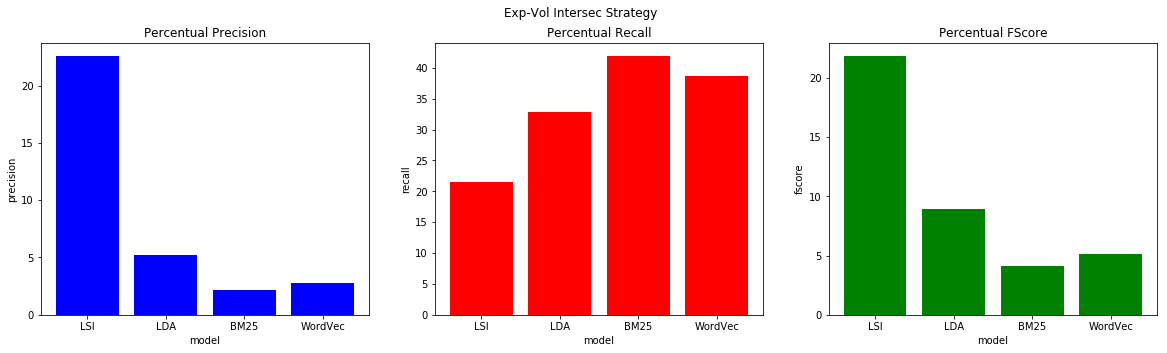

In [7]:
aux_functions.plot_results(results_2, title='Exp-Vol Intersec Strategy')

## Expert Only Strategy

In [8]:
runner_3 = Feat_BR_Runner(oracle=fd.Feat_BR_Oracles.read_feat_br_expert_2_df().T)

lsi_model_3, lsi_eval_3 = runner_3.run_lsi_model()
lda_model_3, lda_eval_3 = runner_3.run_lda_model()
bm25_model_3, bm25_eval_3 = runner_3.run_bm25_model()
w2v_model_3, w2v_eval_3 = runner_3.run_word2vec_model()

Feat_BR Expert Matrix shape: (93, 21)
Features.shape: (21, 8)
SelectedBugReports.shape: (93, 18)

Model Evaluation -------------------------------------------

Model Evaluation -------------------------------------------

Model Evaluation -------------------------------------------

Model Evaluation -------------------------------------------


### Results

In [9]:
results_3 = aux_functions.compile_results({'lsi_model':lsi_model_3,'lda_model':lda_model_3,'bm25_model':bm25_model_3,'w2v_model':w2v_model_3,
                                         'lsi_eval':lsi_eval_3, 'lda_eval':lda_eval_3, 'bm25_eval':bm25_eval_3, 'w2v_eval':w2v_eval_3})
results_3.head()

,model,precision,recall,fscore,precision_perc,recall_perc,fscore_perc
0,LSI_Model_Feat_BR,0.333333,0.296595,0.307168,33.333333,29.659498,30.716846
1,LDA_Model_Feat_BR,0.087750,0.453405,0.142142,8.774962,45.340502,14.214185
2,BM25_Model_Feat_BR,0.037378,0.623656,0.069795,3.737839,62.365591,6.979515
3,WordVec_Model_Feat_BR,0.051649,0.591398,0.093102,5.164861,59.139785,9.310171


### Plots

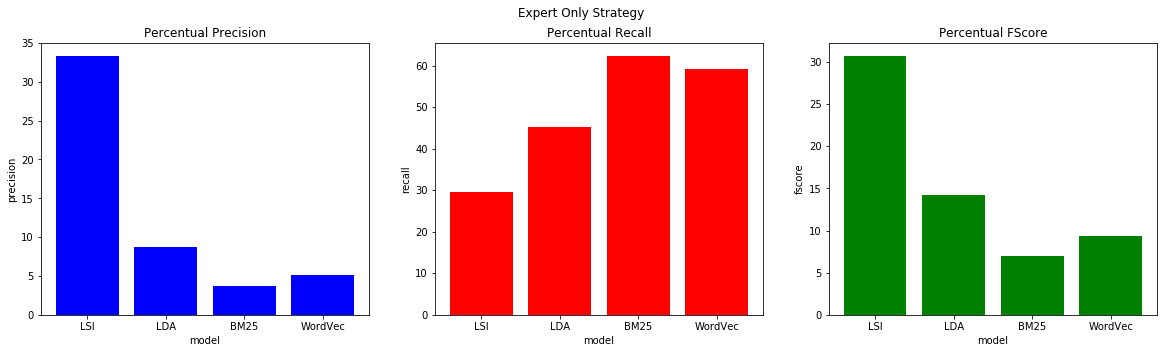

In [10]:
aux_functions.plot_results(results_3, title='Expert Only Strategy')

## Volunteers Only Strategy

In [12]:
runner_4 = Feat_BR_Runner(oracle=fd.Feat_BR_Oracles.read_feat_br_volunteers_df().T)

lsi_model_4, lsi_eval_4 = runner_4.run_lsi_model()
lda_model_4, lda_eval_4 = runner_4.run_lda_model()
bm25_model_4, bm25_eval_4 = runner_4.run_bm25_model()
w2v_model_4, w2v_eval_4 = runner_4.run_word2vec_model()

Feat_BR Volunteers Matrix shape: (93, 21)
Features.shape: (21, 8)
SelectedBugReports.shape: (93, 18)

Model Evaluation -------------------------------------------

Model Evaluation -------------------------------------------

Model Evaluation -------------------------------------------

Model Evaluation -------------------------------------------


### Results

In [13]:
results_4 = aux_functions.compile_results({'lsi_model':lsi_model_4,'lda_model':lda_model_4,'bm25_model':bm25_model_4,'w2v_model':w2v_model_4,
                                         'lsi_eval':lsi_eval_4, 'lda_eval':lda_eval_4, 'bm25_eval':bm25_eval_4, 'w2v_eval':w2v_eval_4})
results_4.head()

,model,precision,recall,fscore,precision_perc,recall_perc,fscore_perc
0,LSI_Model_Feat_BR,0.247312,0.205645,0.215139,24.731183,20.564516,21.513910
1,LDA_Model_Feat_BR,0.101767,0.512276,0.160571,10.176651,51.227599,16.057055
2,BM25_Model_Feat_BR,0.056324,0.784946,0.101381,5.632360,78.494624,10.138111
3,WordVec_Model_Feat_BR,0.066095,0.666935,0.114416,6.609549,66.693548,11.441595


### Plots

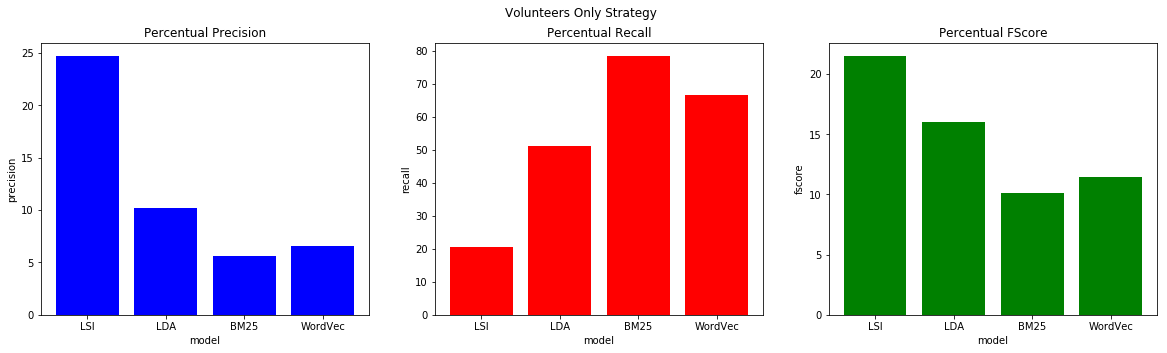

In [14]:
aux_functions.plot_results(results_4, title='Volunteers Only Strategy')